In [106]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy as sp
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, f1_score, recall_score, RocCurveDisplay, confusion_matrix, ConfusionMatrixDisplay
from sklearn.naive_bayes import BernoulliNB
from sklearn.ensemble import RandomForestClassifier
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
adult = fetch_ucirepo(id=2) 
  
# data (as pandas dataframes) 
X = adult.data.features
y = adult.data.targets 

X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             48842 non-null  int64 
 1   workclass       47879 non-null  object
 2   fnlwgt          48842 non-null  int64 
 3   education       48842 non-null  object
 4   education-num   48842 non-null  int64 
 5   marital-status  48842 non-null  object
 6   occupation      47876 non-null  object
 7   relationship    48842 non-null  object
 8   race            48842 non-null  object
 9   sex             48842 non-null  object
 10  capital-gain    48842 non-null  int64 
 11  capital-loss    48842 non-null  int64 
 12  hours-per-week  48842 non-null  int64 
 13  native-country  48568 non-null  object
dtypes: int64(6), object(8)
memory usage: 5.2+ MB


In [107]:
# choose features for modeling
X_subset = X[['age', 'education-num', 'hours-per-week', 'education', 'race', 'sex', 'occupation']]

# one-hot encode relevant features
enc = OneHotEncoder()
enc.fit(X_subset)
enc.categories_
X_subset = enc.transform(X_subset).toarray()

In [108]:
# transform income column
def income_encode(val):
    income_map={"<=50K": 0, "<=50K.": 0, ">50K": 1, ">50K.": 1}
    return income_map[val]

y['mapped_income'] = y['income'].map(income_encode)
y.value_counts()

/var/folders/rk/418lwf_57qn7jqtz_y31ssrc0000gp/T/ipykernel_76642/595749525.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y['mapped_income'] = y['income'].map(income_encode)


income  mapped_income
<=50K   0                24720
<=50K.  0                12435
>50K    1                 7841
>50K.   1                 3846
Name: count, dtype: int64

In [109]:
# select predictors based on observations from pairplots
y_subset = y['mapped_income']

X_train, X_test, y_train, y_test = train_test_split(X_subset, y_subset, stratify=y, random_state=0)

log_clf = LogisticRegression(max_iter=500)
log_clf.fit(X_train, y_train)

y_pred_log = log_clf.predict(X_test)

log_clf_acc = accuracy_score(y_test, y_pred_log)
log_clf_pre = precision_score(y_test, y_pred_log)
log_clf_rec = recall_score(y_test, y_pred_log)
log_clf_f1 = f1_score(y_test, y_pred_log)


In [110]:
nb_clf = BernoulliNB()
nb_clf.fit(X_train, y_train)

y_pred_nb = nb_clf.predict(X_test)

nb_clf_acc = accuracy_score(y_test, y_pred_nb)
nb_clf_pre = precision_score(y_test, y_pred_nb)
nb_clf_rec = recall_score(y_test, y_pred_nb)
nb_clf_f1 = f1_score(y_test, y_pred_nb)

In [111]:
rf_clf = RandomForestClassifier()
rf_clf.fit(X_train, y_train)

y_pred_rf = rf_clf.predict(X_test)

rf_clf_acc = accuracy_score(y_test, y_pred_rf)
rf_clf_pre = precision_score(y_test, y_pred_rf)
rf_clf_rec = recall_score(y_test, y_pred_rf)
rf_clf_f1 = f1_score(y_test, y_pred_rf)

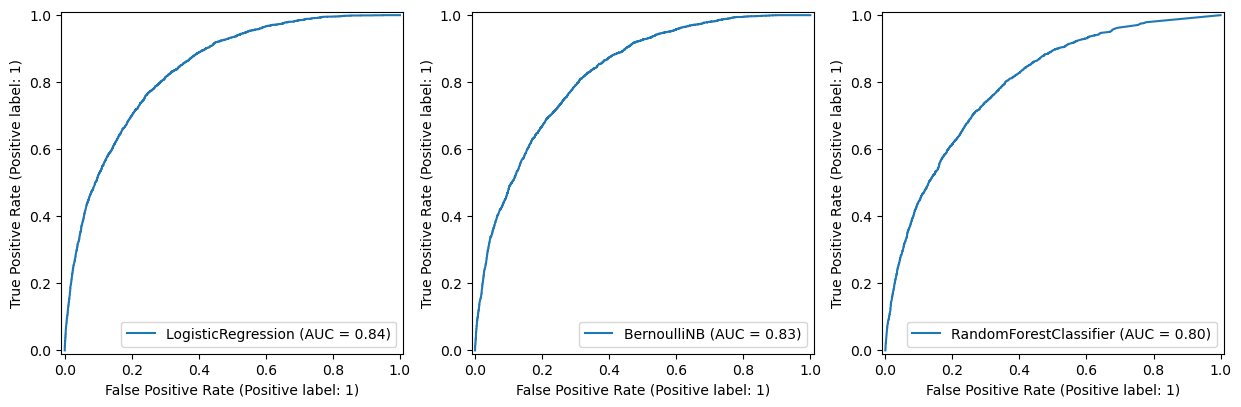

In [112]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

RocCurveDisplay.from_estimator(log_clf, X_test, y_test, ax=axes[0])
RocCurveDisplay.from_estimator(nb_clf, X_test, y_test, ax=axes[1])
RocCurveDisplay.from_estimator(rf_clf, X_test, y_test, ax=axes[2])

plt.show()

In [113]:
print("Logistic Regression Classifier")
print(f"Accuracy score: {log_clf_acc:.4}")
print(f"Precision score: {log_clf_pre:.4}")
print(f"Recall score: {log_clf_rec:.4}")
print(f"F1 score: {log_clf_f1:.4}")

print("\nBernoulli NB Classifier:")
print(f"Accuracy score: {nb_clf_acc:.4}")
print(f"Precision score: {nb_clf_pre:.4}")
print(f"Recall score: {nb_clf_rec:.4}")
print(f"F1 score: {nb_clf_f1:.4}")

print("\nRandom Forest Classifier:")
print(f"Accuracy score: {rf_clf_acc:.4}")
print(f"Precision score: {rf_clf_pre:.4}")
print(f"Recall score: {rf_clf_rec:.4}")
print(f"F1 score: {rf_clf_f1:.4}")

Logistic Regression Classifier
Accuracy score: 0.8142
Precision score: 0.6597
Recall score: 0.4617
F1 score: 0.5432

Bernoulli NB Classifier:
Accuracy score: 0.7857
Precision score: 0.5476
Recall score: 0.6003
F1 score: 0.5727

Random Forest Classifier:
Accuracy score: 0.7895
Precision score: 0.5769
Recall score: 0.4517
F1 score: 0.5067


Text(0.5, 1.0, 'RandomForestClassifier')

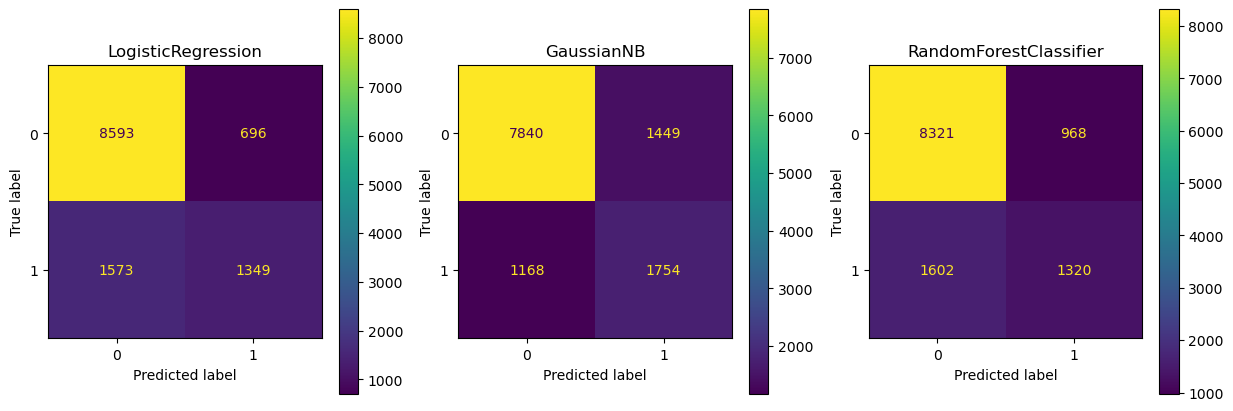

In [114]:
# confusion matrices
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

cm_log = confusion_matrix(y_test, y_pred_log, labels=log_clf.classes_)
disp_log = ConfusionMatrixDisplay(confusion_matrix=cm_log, display_labels=log_clf.classes_)
disp_log.plot(ax=axes[0])
axes[0].set_title("LogisticRegression")

cm_nb = confusion_matrix(y_test, y_pred_nb, labels=nb_clf.classes_)
disp_nb = ConfusionMatrixDisplay(confusion_matrix=cm_nb, display_labels=nb_clf.classes_)
disp_nb.plot(ax=axes[1])
axes[1].set_title("GaussianNB")

cm_rf = confusion_matrix(y_test, y_pred_rf, labels=rf_clf.classes_)
disp_rf = ConfusionMatrixDisplay(confusion_matrix=cm_rf, display_labels=rf_clf.classes_)
disp_rf.plot(ax=axes[2])
axes[2].set_title("RandomForestClassifier")